# 10 Big Cats of the Wild - Multi-class Image Classification

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, layers, losses, optimizers

The data for this project has been taken from Kaggle at the following link:

https://www.kaggle.com/datasets/gpiosenka/cats-in-the-wild-image-classification

In [ ]:
print("TF version: ", tf.__version__)

TF version:  2.12.0


We're going to be classifying images, which is a form of unstructured data. For this project, we will start with the following steps:

1. Import the data
2. Visualize and analyze random samples of the data -> make sure there are no outliers or extremely mislabeled examples
3. Preprocess the data for feeding into a Convolutional NN
4. Create a baseline model
5. Implement callbacks, image augmentation, and transfer learning as necessary to reach our goals.

The goal for this project will be to exceed a minimum of 95% test accuracy.



In [ ]:
# Checking GPU availability for testing
def check_gpu():
  print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

In [ ]:
check_gpu()

GPU available


In [ ]:
# Unzip the data from gDrive location
!unzip "/content/drive/MyDrive/10BigCatsClassification/archive (2).zip"

Archive:  /content/drive/MyDrive/10BigCatsClassification/archive (2).zip
  inflating: EfficientNetB0-10-(224 X 224)-100.00.h5  
  inflating: MobileNetV3 small-10-(224 X 224)-95.96.h5  
  inflating: WILDCATS.CSV            
  inflating: test/AFRICAN LEOPARD/1.jpg  
  inflating: test/AFRICAN LEOPARD/2.jpg  
  inflating: test/AFRICAN LEOPARD/3.jpg  
  inflating: test/AFRICAN LEOPARD/4.jpg  
  inflating: test/AFRICAN LEOPARD/5.jpg  
  inflating: test/CARACAL/1.jpg      
  inflating: test/CARACAL/2.jpg      
  inflating: test/CARACAL/3.jpg      
  inflating: test/CARACAL/4.jpg      
  inflating: test/CARACAL/5.jpg      
  inflating: test/CHEETAH/1.jpg      
  inflating: test/CHEETAH/2.jpg      
  inflating: test/CHEETAH/3.jpg      
  inflating: test/CHEETAH/4.jpg      
  inflating: test/CHEETAH/5.jpg      
  inflating: test/CLOUDED LEOPARD/1.jpg  
  inflating: test/CLOUDED LEOPARD/2.jpg  
  inflating: test/CLOUDED LEOPARD/3.jpg  
  inflating: test/CLOUDED LEOPARD/4.jpg  
  inflating: test/C

In [ ]:
# Extract data from WILDCATS.csv
labels_csv = pd.read_csv("/content/WILDCATS.CSV")
print(labels_csv.describe())
print(labels_csv.head(10))

          class id
count  2439.000000
mean      4.496105
std       2.880140
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000
   class id                      filepaths           labels data set  \
0         0  train/AFRICAN LEOPARD/001.jpg  AFRICAN LEOPARD    train   
1         0  train/AFRICAN LEOPARD/002.jpg  AFRICAN LEOPARD    train   
2         0  train/AFRICAN LEOPARD/003.jpg  AFRICAN LEOPARD    train   
3         0  train/AFRICAN LEOPARD/004.jpg  AFRICAN LEOPARD    train   
4         0  train/AFRICAN LEOPARD/005.jpg  AFRICAN LEOPARD    train   
5         0  train/AFRICAN LEOPARD/006.jpg  AFRICAN LEOPARD    train   
6         0  train/AFRICAN LEOPARD/007.jpg  AFRICAN LEOPARD    train   
7         0  train/AFRICAN LEOPARD/008.jpg  AFRICAN LEOPARD    train   
8         0  train/AFRICAN LEOPARD/009.jpg  AFRICAN LEOPARD    train   
9         0  train/AFRICAN LEOPARD/010.jpg  AFRICAN LEOPARD    train   

          scientific name  
0  Panth

243.9

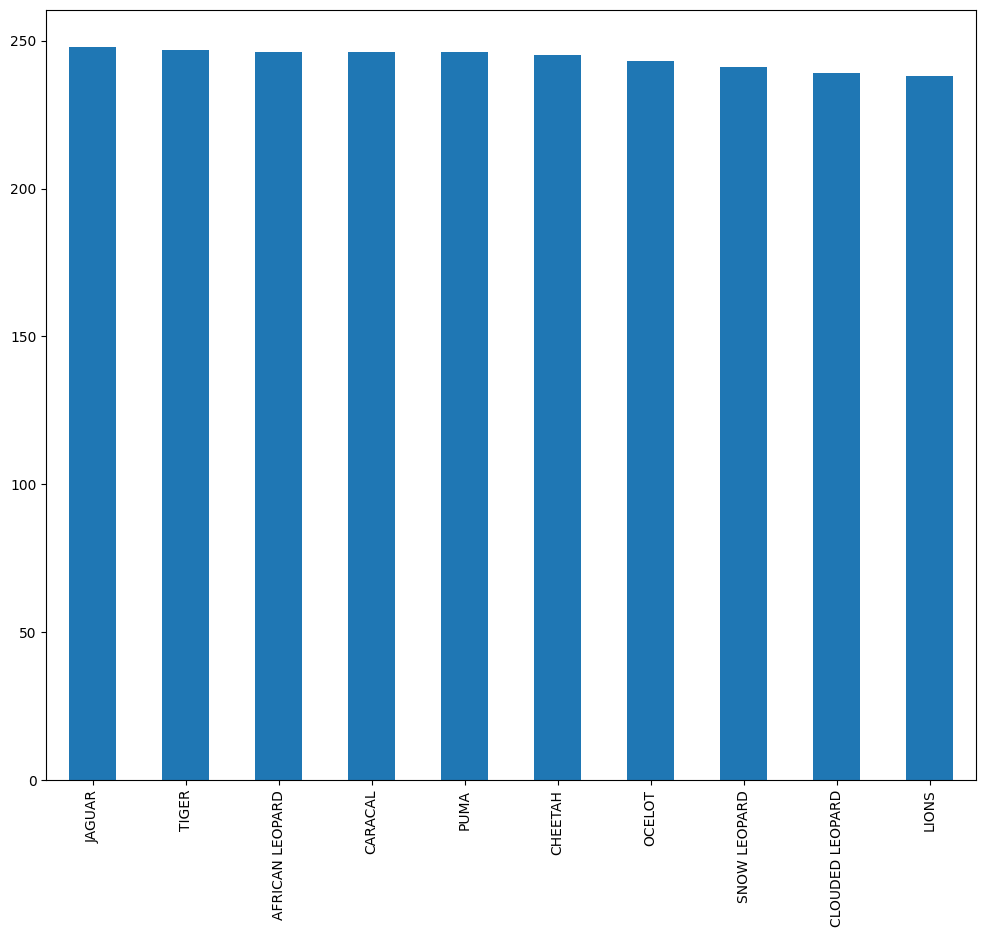

In [ ]:
# How mnay images of each breed are there?
labels_csv["labels"].value_counts().plot.bar(figsize=(12, 10))
labels_csv["labels"].value_counts().mean()

There are about 240-250 of each class, the average being ~244

In [ ]:
# Let's set some base urls and feed examples in to a visualization function
train_dir = "/content/train"
val_dir = "/content/valid"
test_dir = "/content/test"

# Also, let's create a class_names list for reference later
class_names = ["JAGUAR", "TIGER", "AFRICAN LEOPARD", "CARACAL", "PUMA", "CHEETAH", "OCELOT", "SNOW LEOPARD", "CLOUDED LEOPARD", "LIONS"]

In [ ]:
labels_csv.head(10)

,class id,filepaths,labels,data set,scientific name
0,0,train/AFRICAN LEOPARD/001.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
1,0,train/AFRICAN LEOPARD/002.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
2,0,train/AFRICAN LEOPARD/003.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
3,0,train/AFRICAN LEOPARD/004.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
4,0,train/AFRICAN LEOPARD/005.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
5,0,train/AFRICAN LEOPARD/006.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
6,0,train/AFRICAN LEOPARD/007.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
7,0,train/AFRICAN LEOPARD/008.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
8,0,train/AFRICAN LEOPARD/009.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
9,0,train/AFRICAN LEOPARD/010.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus


In [ ]:
import os

for fname in os.listdir(train_dir): 
  print(fname)

PUMA
SNOW LEOPARD
JAGUAR
LIONS
OCELOT
CHEETAH
AFRICAN LEOPARD
TIGER
CARACAL
CLOUDED LEOPARD


In [ ]:
for fname in os.listdir(train_dir):
  for file in os.listdir("train/" + fname + "/"):
    print(fname + "/" + file)

PUMA/097.jpg
PUMA/158.jpg
PUMA/003.jpg
PUMA/173.jpg
PUMA/020.jpg
PUMA/002.jpg
PUMA/050.jpg
PUMA/202.jpg
PUMA/140.jpg
PUMA/069.jpg
PUMA/151.jpg
PUMA/063.jpg
PUMA/011.jpg
PUMA/010.jpg
PUMA/131.jpg
PUMA/166.jpg
PUMA/232.jpg
PUMA/071.jpg
PUMA/029.jpg
PUMA/201.jpg
PUMA/146.jpg
PUMA/124.jpg
PUMA/216.jpg
PUMA/036.jpg
PUMA/092.jpg
PUMA/141.jpg
PUMA/176.jpg
PUMA/114.jpg
PUMA/170.jpg
PUMA/142.jpg
PUMA/144.jpg
PUMA/169.jpg
PUMA/034.jpg
PUMA/220.jpg
PUMA/210.jpg
PUMA/128.jpg
PUMA/211.jpg
PUMA/101.jpg
PUMA/224.jpg
PUMA/199.jpg
PUMA/177.jpg
PUMA/111.jpg
PUMA/198.jpg
PUMA/179.jpg
PUMA/208.jpg
PUMA/137.jpg
PUMA/057.jpg
PUMA/046.jpg
PUMA/035.jpg
PUMA/206.jpg
PUMA/192.jpg
PUMA/212.jpg
PUMA/115.jpg
PUMA/099.jpg
PUMA/127.jpg
PUMA/058.jpg
PUMA/047.jpg
PUMA/081.jpg
PUMA/217.jpg
PUMA/200.jpg
PUMA/062.jpg
PUMA/025.jpg
PUMA/204.jpg
PUMA/054.jpg
PUMA/226.jpg
PUMA/032.jpg
PUMA/040.jpg
PUMA/165.jpg
PUMA/074.jpg
PUMA/222.jpg
PUMA/118.jpg
PUMA/223.jpg
PUMA/090.jpg
PUMA/145.jpg
PUMA/061.jpg
PUMA/073.jpg
PUMA/218.jpg

In [ ]:
labels_csv["filepaths"][244]

'train/CARACAL/009.jpg'

In [ ]:
# Turn our data into numbers
labels = labels_csv["labels"].to_numpy()
labels

array(['AFRICAN LEOPARD', 'AFRICAN LEOPARD', 'AFRICAN LEOPARD', ...,
       'TIGER', 'TIGER', 'TIGER'], dtype=object)

In [ ]:
# If you had more than 10 to keep track of...
unique_breeds = np.unique(labels)
unique_breeds

array(['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD',
       'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER'],
      dtype=object)

In [ ]:
class_names

['JAGUAR',
 'TIGER',
 'AFRICAN LEOPARD',
 'CARACAL',
 'PUMA',
 'CHEETAH',
 'OCELOT',
 'SNOW LEOPARD',
 'CLOUDED LEOPARD',
 'LIONS']

In [ ]:
from matplotlib.pyplot import imread
image = imread(labels_csv.filepaths[42])
image, image.shape

(array([[[ 24,  18,   2],
         [ 24,  18,   2],
         [ 25,  19,   3],
         ...,
         [ 34,  29,  26],
         [100, 109, 108],
         [ 95, 114, 110]],
 
        [[ 23,  17,   1],
         [ 23,  17,   1],
         [ 24,  18,   2],
         ...,
         [230, 226, 214],
         [ 98, 107, 102],
         [ 99, 114, 111]],
 
        [[ 23,  17,   1],
         [ 23,  17,   1],
         [ 24,  18,   2],
         ...,
         [216, 212, 187],
         [102, 112, 101],
         [100, 112, 110]],
 
        ...,
 
        [[ 29,  29,   3],
         [ 27,  27,   3],
         [ 24,  24,   0],
         ...,
         [ 28,  29,  11],
         [ 40,  42,  18],
         [ 38,  38,  12]],
 
        [[ 30,  30,   4],
         [ 27,  27,   3],
         [ 25,  25,   1],
         ...,
         [ 32,  30,  15],
         [ 42,  44,  22],
         [ 38,  38,  14]],
 
        [[ 30,  30,   4],
         [ 27,  27,   3],
         [ 25,  25,   1],
         ...,
         [ 58,  55,  40],
  

Image shape is (224, 224, 3).

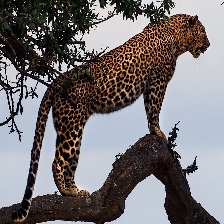

In [ ]:
from IPython.display import Image
Image(labels_csv.filepaths[0])

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# Double check all images are of the same size
shape = (224, 224, 3)

for fname in os.listdir(train_dir):
  for file in os.listdir("train/" + fname):
    image = imread("train/" + fname + "/" + file)
    if image.shape != shape:
      print(fname + "/" + file)

There are no files with the wrong shape. Let's move onto the next step.

Knowing the image size and min-max pixel values, we can now begin normalizing our data and prepare to feed it into a baseline CNN.

In [ ]:
IMG_SIZE = 224

In [ ]:
# Load in images from directory using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data and normalize pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Import data from respective directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (IMG_SIZE, IMG_SIZE),
                                               class_mode = "categorical")

val_data = val_datagen.flow_from_directory(directory = val_dir,
                                            batch_size = 32,
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = "categorical")

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
len(train_data)

74

In [ ]:
74 * 32

2368

Batch number has been rounded up. Everything looks about right.

We will revisit these later to implement data augmentation after having established a model baseline.

In [ ]:
# Get a tensorboard callback ready
import datetime

def create_tb_callback():
  logdir = os.path.join("/content/drive/MyDrive/10BigCatsClassification/tb_logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.layers import GlobalAveragePooling2D
# Build a baseline CNN model

tensorboard = create_tb_callback()

baseline = Sequential([
    layers.Conv2D(filters=32,
          kernel_size=(3, 3),
          strides=1,
          activation='relu',
          input_shape=(224, 224, 3)),
    layers.Conv2D(32, 3, 1, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16, 3, 1, activation='relu'),
    layers.Conv2D(16, 3, 1, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(len(class_names), activation="softmax")
], name = "baseline_model")

baseline.compile(loss = losses.CategoricalCrossentropy(),
                 optimizer = optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
baseline.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                

In [ ]:
# Ensure GPU running
check_gpu()

GPU available


In [ ]:
# Fit the model to the training data
baseline_history = baseline.fit(train_data, epochs = 10,
                                steps_per_epoch=len(train_data),
                                validation_data = val_data,
                                validation_steps=len(val_data),
                                callbacks=[tensorboard])

Epoch 1/10
74/74 [==============================] - 26s 169ms/step - loss: 2.1882 - accuracy: 0.1539 - val_loss: 1.9557 - val_accuracy: 0.2000
Epoch 2/10
74/74 [==============================] - 8s 108ms/step - loss: 1.7422 - accuracy: 0.3442 - val_loss: 1.5355 - val_accuracy: 0.4200
Epoch 3/10
74/74 [==============================] - 12s 163ms/step - loss: 1.2459 - accuracy: 0.5575 - val_loss: 1.3906 - val_accuracy: 0.4200
Epoch 4/10
74/74 [==============================] - 8s 107ms/step - loss: 0.5667 - accuracy: 0.8260 - val_loss: 1.7957 - val_accuracy: 0.3600
Epoch 5/10
74/74 [==============================] - 12s 169ms/step - loss: 0.1264 - accuracy: 0.9675 - val_loss: 2.0486 - val_accuracy: 0.4400
Epoch 6/10
74/74 [==============================] - 11s 150ms/step - loss: 0.0190 - accuracy: 0.9987 - val_loss: 2.5904 - val_accuracy: 0.4000
Epoch 7/10
74/74 [==============================] - 12s 159ms/step - loss: 0.0081 - accuracy: 0.9996 - val_loss: 2.7310 - val_accuracy: 0.4400
E

In [ ]:
# Plot loss curves and learning rate to move on from our baseline
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

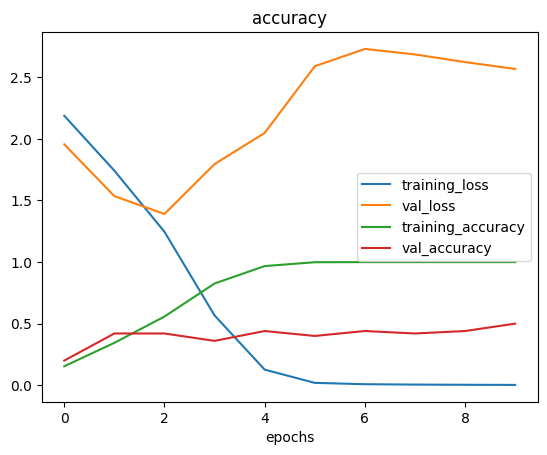

In [ ]:
plot_loss_curves(baseline_history)

Text(0.5, 1.0, 'Find ideal LR')

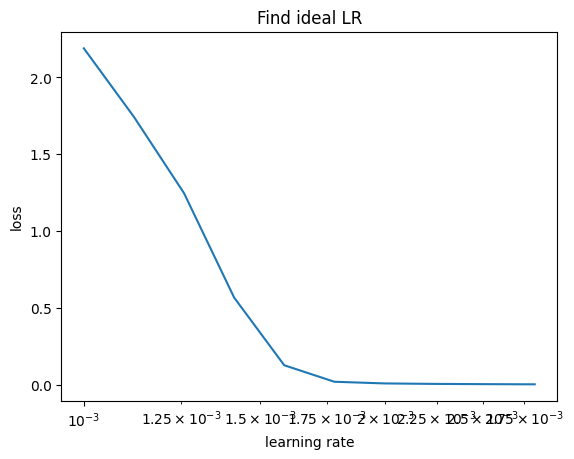

In [ ]:
# Find ideal learning rate
lrs = 1e-3 * 10**(tf.range(10)/20)
plt.semilogx(lrs, baseline_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Find ideal LR")

In [ ]:
# Prepare callbacks for next model
def create_model_checkpoint(model_name,
                            save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,
                                                                    model_name),
                                            monitor="val_loss",
                                            verbose=False,
                                            save_best_only=True)
  
# EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                 patience=3,
                                 restore_best_weights=True)

# LRScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.5e-3 * 0.9**epoch)

The model is overfitting terribly so far. We are going to try incorporating a few things here to combat this:

1. Add data augmentation
2. Reduce the amount of Conv2D layers
3. Incorporate Dropout layers in the NN Dense section
4. Adding in several callbacks

After this, we will bring in some Transfer Learning and try to optimize the model performance that way.

In [ ]:
# Create the augmented data from train_dir
train_datagen_aug = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=0.3,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(directory = train_dir,
                                                                  batch_size = 32,
                                                                  target_size = (IMG_SIZE, IMG_SIZE),
                                                                  class_mode = "categorical")

Found 2339 images belonging to 10 classes.


In [ ]:
# Rebuild model as specific above
model0 = Sequential([
    layers.Conv2D(filters=32,
          kernel_size=(3, 3),
          strides=1,
          activation='relu',
          input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16, 3, 1, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation="softmax")
], name = "model0")

model0.compile(loss = losses.CategoricalCrossentropy(),
                 optimizer = optimizers.Adam(),
                 metrics=['accuracy'])

checkpoint = create_model_checkpoint(model0.name)

history_0 = model0.fit(train_data_aug, epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps=len(val_data),
                        callbacks=[tensorboard,
                                   checkpoint,
                                   early_stop,
                                   lr_scheduler])

Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 2.3056 - accuracy: 0.1039

74/74 [==============================] - 38s 479ms/step - loss: 2.3056 - accuracy: 0.1039 - val_loss: 2.2701 - val_accuracy: 0.1000 - lr: 0.0015
Epoch 2/10
74/74 [==============================] - 32s 431ms/step - loss: 2.2962 - accuracy: 0.1069 - val_loss: 2.2921 - val_accuracy: 0.1200 - lr: 0.0014
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 2.2768 - accuracy: 0.1407

74/74 [==============================] - 34s 454ms/step - loss: 2.2768 - accuracy: 0.1407 - val_loss: 2.2464 - val_accuracy: 0.1000 - lr: 0.0012
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 2.2358 - accuracy: 0.1479

74/74 [==============================] - 35s 470ms/step - loss: 2.2358 - accuracy: 0.1479 - val_loss: 2.1916 - val_accuracy: 0.1200 - lr: 0.0011
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 2.1972 - accuracy: 0.1629

74/74 [==============================] - 35s 474ms/step - loss: 2.1972 - accuracy: 0.1629 - val_loss: 2.1151 - val_accuracy: 0.2400 - lr: 9.8415e-04
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 2.1366 - accuracy: 0.1826

74/74 [==============================] - 34s 458ms/step - loss: 2.1366 - accuracy: 0.1826 - val_loss: 2.0553 - val_accuracy: 0.2200 - lr: 8.8573e-04
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 2.0842 - accuracy: 0.1885

74/74 [==============================] - 33s 453ms/step - loss: 2.0842 - accuracy: 0.1885 - val_loss: 2.0152 - val_accuracy: 0.2200 - lr: 7.9716e-04
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 2.0410 - accuracy: 0.1877

74/74 [==============================] - 35s 474ms/step - loss: 2.0410 - accuracy: 0.1877 - val_loss: 1.9458 - val_accuracy: 0.2800 - lr: 7.1745e-04
Epoch 9/10
74/74 [==============================] - 33s 452ms/step - loss: 2.0169 - accuracy: 0.2044 - val_loss: 1.9748 - val_accuracy: 0.2200 - lr: 6.4570e-04
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 2.0160 - accuracy: 0.1932

74/74 [==============================] - 39s 525ms/step - loss: 2.0160 - accuracy: 0.1932 - val_loss: 1.8974 - val_accuracy: 0.2800 - lr: 5.8113e-04


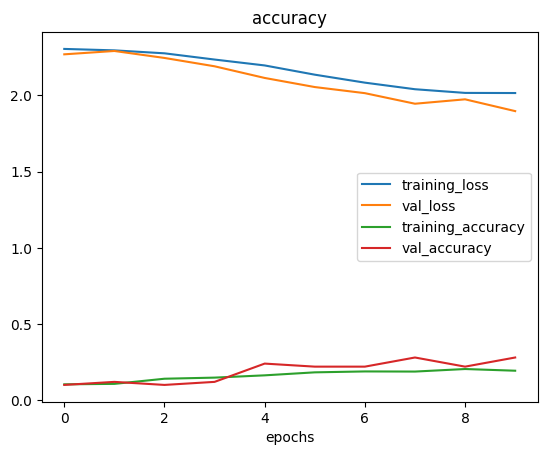

In [ ]:
plot_loss_curves(history_0)

Steady decrease on the loss curves. However, the accuracy is still quite poor and we'd have to train for many epochs to combat that. Let's try a few more architecture tweaks before implementing  transfer learning:

* Different Dropout layers
* Different hyperparams
* Batch Normalization layers

In [ ]:
# Incorporate different Dropout layers and different hyperparams

model1 = Sequential([
    layers.Conv2D(filters=10,
          kernel_size=(3, 3),
          strides=1,
          activation='relu',
          input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(10, 3, 1, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation="softmax")
], name = "model1")

model1.compile(loss = losses.CategoricalCrossentropy(),
                 optimizer = optimizers.Adam(lr = 1.5e-3),
                 metrics=['accuracy'])

checkpoint = create_model_checkpoint(model1.name)

history_1 = model0.fit(train_data_aug, epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps=len(val_data),
                        callbacks=[tensorboard,
                                   checkpoint,
                                   early_stop,
                                   lr_scheduler])

Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 1.9820 - accuracy: 0.2031

74/74 [==============================] - 40s 544ms/step - loss: 1.9820 - accuracy: 0.2031 - val_loss: 1.9143 - val_accuracy: 0.3600 - lr: 0.0015
Epoch 2/10
74/74 [==============================] - 33s 441ms/step - loss: 1.9419 - accuracy: 0.2078 - val_loss: 2.0787 - val_accuracy: 0.2600 - lr: 0.0014
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 1.9300 - accuracy: 0.2274

74/74 [==============================] - 34s 462ms/step - loss: 1.9300 - accuracy: 0.2274 - val_loss: 1.7992 - val_accuracy: 0.3000 - lr: 0.0012
Epoch 4/10
74/74 [==============================] - 34s 466ms/step - loss: 1.8954 - accuracy: 0.2484 - val_loss: 1.9179 - val_accuracy: 0.3000 - lr: 0.0011
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 1.8726 - accuracy: 0.2270

74/74 [==============================] - 33s 450ms/step - loss: 1.8726 - accuracy: 0.2270 - val_loss: 1.7387 - val_accuracy: 0.4200 - lr: 9.8415e-04
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 1.8414 - accuracy: 0.2505

74/74 [==============================] - 34s 454ms/step - loss: 1.8414 - accuracy: 0.2505 - val_loss: 1.7112 - val_accuracy: 0.4200 - lr: 8.8573e-04
Epoch 7/10
74/74 [==============================] - 32s 438ms/step - loss: 1.8387 - accuracy: 0.2510 - val_loss: 1.7516 - val_accuracy: 0.3800 - lr: 7.9716e-04
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 1.8371 - accuracy: 0.2574

74/74 [==============================] - 35s 472ms/step - loss: 1.8371 - accuracy: 0.2574 - val_loss: 1.6878 - val_accuracy: 0.3800 - lr: 7.1745e-04
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 1.7974 - accuracy: 0.2634

74/74 [==============================] - 37s 495ms/step - loss: 1.7974 - accuracy: 0.2634 - val_loss: 1.6331 - val_accuracy: 0.4800 - lr: 6.4570e-04
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 1.8191 - accuracy: 0.2595

74/74 [==============================] - 34s 454ms/step - loss: 1.8191 - accuracy: 0.2595 - val_loss: 1.6306 - val_accuracy: 0.4800 - lr: 5.8113e-04


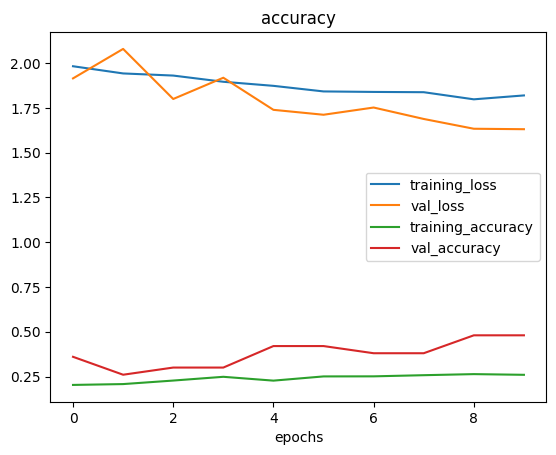

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Recreate model1 architecture but with BatchNorm layers
model2 = Sequential([
    layers.Conv2D(filters=10,
          kernel_size=(3, 3),
          strides=1,
          activation='relu',
          input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(10, 3, 1, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(len(class_names), activation="softmax")
], name = "model2")

model2.compile(loss = losses.CategoricalCrossentropy(),
                 optimizer = optimizers.Adam(lr = 1.5e-3),
                 metrics=['accuracy'])

checkpoint = create_model_checkpoint(model2.name)

history_2 = model2.fit(train_data_aug, epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps=len(val_data),
                        callbacks=[tensorboard,
                                   checkpoint,
                                   early_stop,
                                   lr_scheduler])

Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 2.3218 - accuracy: 0.1719

74/74 [==============================] - 60s 768ms/step - loss: 2.3218 - accuracy: 0.1719 - val_loss: 3.9543 - val_accuracy: 0.1000 - lr: 0.0015
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 2.0455 - accuracy: 0.2445

74/74 [==============================] - 38s 519ms/step - loss: 2.0455 - accuracy: 0.2445 - val_loss: 2.9520 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 3/10
74/74 [==============================] - 38s 508ms/step - loss: 1.9353 - accuracy: 0.2715 - val_loss: 3.0965 - val_accuracy: 0.1000 - lr: 0.0012
Epoch 4/10
74/74 [==============================] - 43s 578ms/step - loss: 1.8780 - accuracy: 0.3014 - val_loss: 4.9034 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 5/10
74/74 [==============================] - 35s 471ms/step - loss: 1.8168 - accuracy: 0.3121 - val_loss: 6.9504 - val_accuracy: 0.1000 - lr: 9.8415e-04


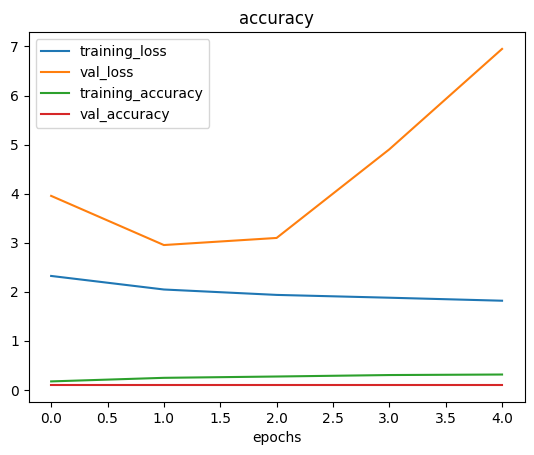

In [ ]:
plot_loss_curves(history_2)

None of our experiments have been very successful so far. Time to incorporate some Transfer Learning:

1. Import model architecture using TensorFlow Hub
2. Create a pretrained instance with frozen layers
3. Fine-tune the layers we want to train and fit it to our augmented dataset

# Implementing Transfer Learning

In [ ]:
# Model URLs for reference
import tensorflow_hub as hub

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Functionize creation of models from tf Hub URLs
def create_model(model_url, num_classes = len(class_names)):

  # Download pretrained model and save it as a Keras layer
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='feature_extraction_layer',
                                            input_shape = (IMG_SIZE, IMG_SIZE) + (3, ))
  
  # Create model
  model = Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model

# Create baseline ResNet and EfficientNet model instances
resnet_model = create_model(resnet_url)
effnet_model = create_model(efficientnet_url)

In [ ]:
# Fit resnet model to get a baseline performance, do the same for effnet after
resnet_model.compile(loss = losses.CategoricalCrossentropy(),
                     optimizer=optimizers.Adam(),
                     metrics=['accuracy'])


effnet_model.compile(loss = losses.CategoricalCrossentropy(),
                     optimizer=optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_aug, epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps=len(val_data),
                        callbacks=[tensorboard,
                                   early_stop])

Epoch 1/10
74/74 [==============================] - 37s 497ms/step - loss: 0.2304 - accuracy: 0.9414 - val_loss: 0.1092 - val_accuracy: 0.9800
Epoch 2/10
74/74 [==============================] - 33s 448ms/step - loss: 0.1886 - accuracy: 0.9487 - val_loss: 0.0990 - val_accuracy: 0.9800
Epoch 3/10
74/74 [==============================] - 33s 446ms/step - loss: 0.1690 - accuracy: 0.9615 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 4/10
74/74 [==============================] - 36s 486ms/step - loss: 0.1590 - accuracy: 0.9581 - val_loss: 0.0935 - val_accuracy: 0.9800
Epoch 5/10
74/74 [==============================] - 33s 449ms/step - loss: 0.1471 - accuracy: 0.9590 - val_loss: 0.0939 - val_accuracy: 0.9400
Epoch 6/10
74/74 [==============================] - 33s 446ms/step - loss: 0.1275 - accuracy: 0.9649 - val_loss: 0.0909 - val_accuracy: 0.9800
Epoch 7/10
74/74 [==============================] - 35s 468ms/step - loss: 0.1244 - accuracy: 0.9645 - val_loss: 0.0747 - val_accuracy: 0.9800

In [ ]:
effnet_history = effnet_model.fit(train_data_aug, epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = val_data,
                        validation_steps=len(val_data),
                        callbacks=[tensorboard,
                                   early_stop])

Epoch 1/10
74/74 [==============================] - 47s 483ms/step - loss: 0.9954 - accuracy: 0.7914 - val_loss: 0.4678 - val_accuracy: 0.9000
Epoch 2/10
74/74 [==============================] - 33s 443ms/step - loss: 0.3687 - accuracy: 0.9324 - val_loss: 0.2863 - val_accuracy: 0.9600
Epoch 3/10
74/74 [==============================] - 34s 460ms/step - loss: 0.2663 - accuracy: 0.9440 - val_loss: 0.2093 - val_accuracy: 0.9600
Epoch 4/10
74/74 [==============================] - 34s 463ms/step - loss: 0.2156 - accuracy: 0.9581 - val_loss: 0.1705 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 34s 459ms/step - loss: 0.1922 - accuracy: 0.9530 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 33s 450ms/step - loss: 0.1734 - accuracy: 0.9619 - val_loss: 0.1276 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 33s 445ms/step - loss: 0.1668 - accuracy: 0.9590 - val_loss: 0.1172 - val_accuracy: 0.9800

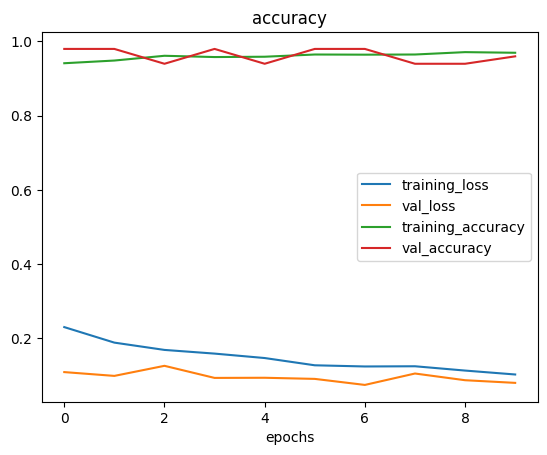

In [ ]:
# Plot loss and accuracy for both transfer learning models
plot_loss_curves(resnet_history)

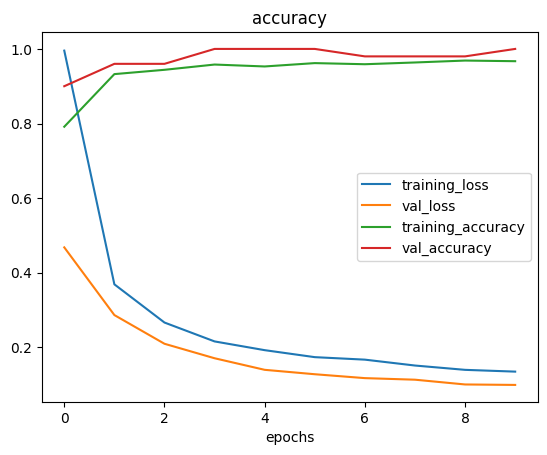

In [ ]:
plot_loss_curves(effnet_history)

They are both doing *much* better. The sets of curves have basically switched places after implementing an extracted feature architecture. For a couple final tests, though, before evaluating all of our models and selecting a winner, let's make some of the layers trainable and run it again so that our experiment is tailored more specifically to our case.

We'll do this using the Functional API architecture this time.

In [ ]:
# Create base models and unfreeze some layers to be trainable
base_effnet = tf.keras.applications.EfficientNetB0(include_top=False)

base_resnet = tf.keras.applications.ResNet50V2(include_top=False)

base_effnet.trainable = True
base_resnet.trainable = True

In [ ]:
for layer in base_resnet.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f31152248b0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31149a3730> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f31152ba370> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f3114987580> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3114a23250> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3114b64760> True
<keras.layers.core.activation.Activation object at 0x7f3114a73d60> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f31149874c0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f31149ac400> True
<keras.layers.core.activation.Activation object at 0x7f3114a966a0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31149efa90> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3114a053d0> True
<keras.layers.normalization.batch_normali

In [ ]:
for layer in base_resnet.layers[:-11]:
  layer.trainable = False

In [ ]:
for layer in base_resnet.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f31152248b0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31149a3730> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f31152ba370> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f3114987580> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3114a23250> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3114b64760> False
<keras.layers.core.activation.Activation object at 0x7f3114a73d60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f31149874c0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f31149ac400> False
<keras.layers.core.activation.Activation object at 0x7f3114a966a0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31149efa90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3114a053d0> False
<keras.layers.normalization.b

In [ ]:
for layer in base_effnet.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f311413baf0> True
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f311413b2b0> True
<keras.layers.preprocessing.normalization.Normalization object at 0x7f3114103ee0> True
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f31153cc4f0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31153ccbe0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f311410fa90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3115759d90> True
<keras.layers.core.activation.Activation object at 0x7f31140d33a0> True
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f31141197f0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3115488310> True
<keras.layers.core.activation.Activation object at 0x7f31153539a0> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object a

In [ ]:
for layer in base_effnet.layers[:-8]:
  layer.trainable = False

In [ ]:
for layer in base_effnet.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f311413baf0> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f311413b2b0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x7f3114103ee0> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f31153cc4f0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f31153ccbe0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f311410fa90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3115759d90> False
<keras.layers.core.activation.Activation object at 0x7f31140d33a0> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f31141197f0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3115488310> False
<keras.layers.core.activation.Activation object at 0x7f31153539a0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling

In [ ]:
# Create Functional architecture for effnet first, then resnet

# EfficientNet
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_effnet(inputs)
x = layers.GlobalAveragePooling2D(name="global_avg_pool")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
effnet = tf.keras.Model(inputs, outputs)

effnet.compile(loss = losses.CategoricalCrossentropy(), 
               optimizer = optimizers.Adam(),
               metrics=['accuracy'])

# ResNet50 v2
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = layers.experimental.preprocessing.Rescaling(1./255) # requires normalization layer
x = base_resnet(inputs)
x = layers.GlobalAveragePooling2D(name="global_avg_pool")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
resnet = tf.keras.Model(inputs, outputs)

resnet.compile(loss = losses.CategoricalCrossentropy(), 
               optimizer = optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
effnet_history = effnet.fit(train_data_aug, epochs=10,
           steps_per_epoch=len(train_data),
           validation_data=val_data,
           validation_steps=len(val_data),
           callbacks=[tensorboard, early_stop])

Epoch 1/10
74/74 [==============================] - 60s 660ms/step - loss: 2.3521 - accuracy: 0.1065 - val_loss: 2.3195 - val_accuracy: 0.1800
Epoch 2/10
74/74 [==============================] - 33s 450ms/step - loss: 2.2932 - accuracy: 0.1283 - val_loss: 2.3429 - val_accuracy: 0.1000
Epoch 3/10
74/74 [==============================] - 33s 440ms/step - loss: 2.2281 - accuracy: 0.1531 - val_loss: 2.4284 - val_accuracy: 0.1000
Epoch 4/10
74/74 [==============================] - 38s 518ms/step - loss: 2.1881 - accuracy: 0.1548 - val_loss: 2.4379 - val_accuracy: 0.1000


In [ ]:
resnet_history = effnet.fit(train_data_aug, epochs=10,
           steps_per_epoch=len(train_data),
           validation_data=val_data,
           validation_steps=len(val_data),
           callbacks=[tensorboard, early_stop])

Epoch 1/10
74/74 [==============================] - 47s 628ms/step - loss: 2.2896 - accuracy: 0.1364 - val_loss: 2.3366 - val_accuracy: 0.1000
Epoch 2/10
74/74 [==============================] - 34s 461ms/step - loss: 2.2314 - accuracy: 0.1428 - val_loss: 2.3817 - val_accuracy: 0.1000
Epoch 3/10
74/74 [==============================] - 81s 1s/step - loss: 2.1908 - accuracy: 0.1612 - val_loss: 2.3561 - val_accuracy: 0.1000
Epoch 4/10
74/74 [==============================] - 38s 509ms/step - loss: 2.1842 - accuracy: 0.1539 - val_loss: 2.4159 - val_accuracy: 0.1200


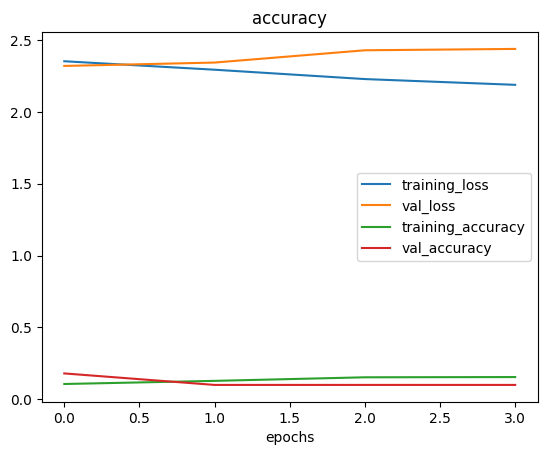

In [ ]:
plot_loss_curves(effnet_history)

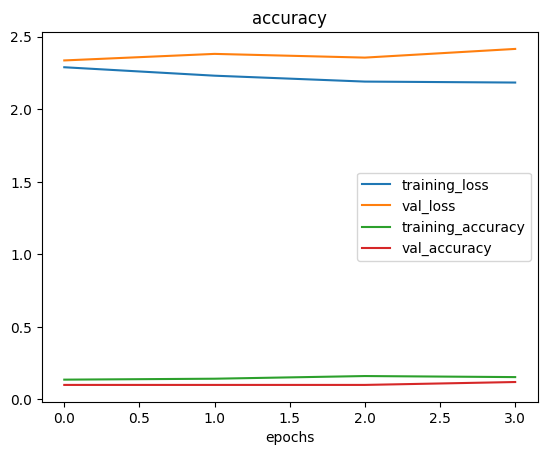

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
# Let's create a dictionary of our models to functionize evaluation

models = {"baseline": baseline,
          "model0": model0,
          "model1": model1,
          "model2": model2,
          "ResNet50vs": resnet_model,
          "EfficientNetB0": effnet_model,
          "ResNet Fine-Tuned": resnet,
          "EffNet Fine-Tuned": effnet}

In [ ]:
def evaluate_model(model):

  print(f"{model.name} validation data scores:")
  scores = model.evaluate(val_data)
  print("Accuracy: {:.2f}%".format(scores[1] * 100))
  print("Loss: {:.3f}".format(scores[0]))

  print(f"{model.name} test data scores:")
  scores = model.evaluate(test_data)
  print("Accuracy: {:.2f}%".format(scores[1] * 100))
  print("Loss: {:.3f}".format(scores[0]))
  print("\n= = = = = = = = = =\n")

In [ ]:
for model in models.values():
  evaluate_model(model)

baseline_model validation data scores:
2/2 [==============================] - 0s 49ms/step - loss: 2.5683 - accuracy: 0.5000
Accuracy: 50.00%
Loss: 2.568
baseline_model test data scores:
2/2 [==============================] - 0s 40ms/step - loss: 3.5835 - accuracy: 0.4000
Accuracy: 40.00%
Loss: 3.583

= = = = = = = = = =

model0 validation data scores:
2/2 [==============================] - 0s 45ms/step - loss: 1.6306 - accuracy: 0.4800
Accuracy: 48.00%
Loss: 1.631
model0 test data scores:
2/2 [==============================] - 0s 43ms/step - loss: 1.6538 - accuracy: 0.3000
Accuracy: 30.00%
Loss: 1.654

= = = = = = = = = =

model1 validation data scores:
2/2 [==============================] - 0s 41ms/step - loss: 2.2942 - accuracy: 0.1600
Accuracy: 16.00%
Loss: 2.294
model1 test data scores:
2/2 [==============================] - 0s 46ms/step - loss: 2.2998 - accuracy: 0.1400
Accuracy: 14.00%
Loss: 2.300

= = = = = = = = = =

model2 validation data scores:
2/2 [========================

In [ ]:
for i, model in enumerate(models.values()):
  if i > 3:
    print(model.name)

sequential
sequential_1
model_2
model_1


These correspond to `resnet_model` and `effnet_model` respectively. These were the unfrozen versions of the transfer learning models we imported.

Let's put them next to each other, to simplify things:

In [ ]:
evaluate_model(resnet_model), evaluate_model(effnet_model)

sequential validation data scores:
2/2 [==============================] - 0s 79ms/step - loss: 0.0747 - accuracy: 0.9800
Accuracy: 98.00%
Loss: 0.075
sequential test data scores:
2/2 [==============================] - 1s 120ms/step - loss: 0.0370 - accuracy: 1.0000
Accuracy: 100.00%
Loss: 0.037

= = = = = = = = = =

sequential_1 validation data scores:
2/2 [==============================] - 0s 88ms/step - loss: 0.0990 - accuracy: 1.0000
Accuracy: 100.00%
Loss: 0.099
sequential_1 test data scores:
2/2 [==============================] - 0s 59ms/step - loss: 0.0620 - accuracy: 1.0000
Accuracy: 100.00%
Loss: 0.062

= = = = = = = = = =



(None, None)

Despite the difference in `Accuracy` scores, the `resnet_model` had lower losses on both validation and test sets, though taking noticeably longer to compute on the test set.

Seeing as we are only after model performance and not computational efficiency today, though, the winner is the `resnet_model`.

Let's go ahead and save/export it.

In [ ]:
resnet_model.save("10-Big-Cats-ResNet50v2-CLF-model.h5")

In [ ]:
loaded_resnet = tf.keras.models.load_model("/content/10-Big-Cats-ResNet50v2-CLF-model.h5",
                                           custom_objects={"KerasLayer":hub.KerasLayer})
loaded_model_preds = loaded_resnet.predict(test_data)
loaded_model_preds

2/2 [==============================] - 1s 103ms/step


array([[9.79647785e-02, 4.88020232e-05, 8.58666972e-05, 8.71339440e-01,
        1.37981521e-02, 8.07986071e-04, 6.43483084e-03, 5.65377377e-05,
        7.03319628e-03, 2.43036100e-03],
       [5.10975812e-03, 7.71495525e-06, 9.93811309e-01, 2.54164866e-06,
        5.52028592e-04, 1.58194583e-04, 1.10157453e-05, 1.91395102e-05,
        3.26826674e-04, 1.63363859e-06],
       [9.67197776e-01, 3.96453834e-06, 2.80835126e-02, 1.71183547e-05,
        2.00264249e-03, 8.02445109e-04, 3.74793854e-05, 5.32057129e-06,
        1.84861408e-03, 1.08805955e-06],
       [1.12161005e-03, 7.75466498e-04, 6.49331560e-05, 1.74255893e-02,
        1.99950114e-03, 5.00049573e-05, 9.77893472e-01, 3.37279751e-04,
        7.70706974e-05, 2.55090330e-04],
       [1.42445434e-02, 5.57866879e-05, 4.77524998e-04, 1.07280454e-02,
        9.60966825e-01, 9.27921938e-05, 1.27215721e-02, 4.60799929e-05,
        3.25968780e-04, 3.40828788e-04],
       [2.99438784e-06, 3.47255695e-06, 4.02049693e-07, 1.13865384e-03,
   

In [ ]:
loaded_resnet.evaluate(test_data)

2/2 [==============================] - 2s 91ms/step - loss: 0.0370 - accuracy: 1.0000


[0.03700123354792595, 1.0]

Loading and saving was successful. Our experiments are complete and we successfully surpassed the minimum 95% accuracy threshold.


# **[Thank You]**